In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math

 Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are - [[ 0.43434994  0.03295014]]
 Q.1-1 - 1st Order Polynomial Regression, RMSE is - 2.2359787375118474


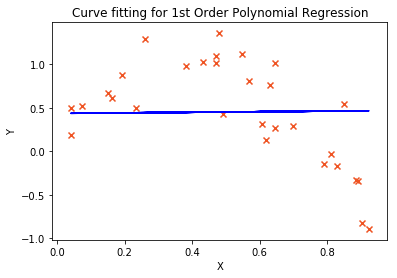

In [2]:
# Q.1-1 - 1st Order Polynomial Regression

# Reading and plotting data
data1 = pd.read_csv('ex2data1.csv', sep=",", encoding='utf-8', header='infer')
df = data1.copy()
def get_rmse(x, y, beta):
    m = len(x)
    inner = np.power(((x * beta.T) - y), 2)
    return math.sqrt(np.sum(inner) / (2 * m))

def drawPlot(Xcord, Ycord, y_pred, order):
    plt.scatter(Xcord, Ycord, c='#ef5423', marker='x')
    plt.ylabel('Y');
    plt.xlabel('X');
    str = 'Line' if order == 1 else 'Curve'
    order = '1st' if order == 1 else '2nd' if order ==2 else '3rd' if order == 3 else order+'th' 
    plt.title( str + ' fitting for ' + order + ' Order Polynomial Regression')
    plt.plot(Xcord, y_pred, c='blue')

def gradientDescentUsingMatrix(x, y, beta, learning_rate, iters):  
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(iters):
        error = (x * beta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = beta[0,j] - ((learning_rate / len(x)) * np.sum(term))
            
        beta = temp
        old_cost = new_cost
        new_cost = get_rmse(x, y, beta)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print ("cost : " + str(new_cost))
        cost[i] = str(new_cost)
        cost_history.append(new_cost)
    #plt.plot(cost_history)
    #plt.show()
    return beta, cost, new_cost

df.insert(0,-1,1) # inserting ones column for beta0
df1 = df[[-1,'x']]
df2 = df['y']
X =  np.matrix(df1.values)
Y =  np.matrix(df2.values)
beta = np.matrix(np.zeros(X.shape[1]))
beta, costs, rmse = gradientDescentUsingMatrix(X, Y, beta, 0.01, 10000)
y_pred = X * beta.T
drawPlot(df['x'], df['y'], y_pred, 1);
print(" Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -", beta)
print(" Q.1-1 - 1st Order Polynomial Regression, RMSE is - " + str(rmse))

 Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are - [[ 0.68207425 -0.75467887 -0.71247584]]
 Q.1-2 - 2nd Order Polynomial Regression, RMSE is - 0.3442417901444065


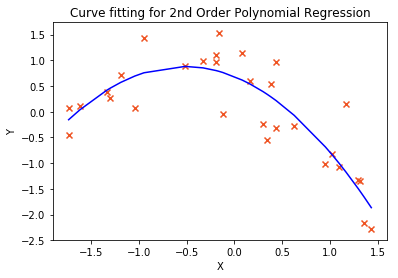

In [3]:
# Q.1-2 - 2nd Order Polynomial Regression

def generatePolynomialInput(df, order):
    for i in range(2,order+1):
        df[i] = df['x']**i
    return df

def performPolynomialRegression(X, Y, learning_rate, iters, order):
    beta = np.matrix(np.zeros(order+1))
    normalized_df_poly = generatePolynomialInput(X, order)
    #print(normalized_df_poly.head())
    XM = np.matrix(normalized_df_poly)
    YM = np.matrix(Y)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    beta, costs, rmse = gradientDescentUsingMatrix(XM, YM, beta, learning_rate, iters)
    y_pred = XM * beta.T
    drawPlot(Xcord, Ycord, y_pred, order);
    return beta, rmse

# Normalize the data for proper scaling
df = data1
normalized_df=(df-df.mean())/df.std()
normalized_df.insert(0,-1,1)# inserting ones column for beta0
normalized_df = normalized_df.sort_values(by=['x']) # sort values for plotting sane graph
X = normalized_df[[-1,'x']]
Y = normalized_df[['y']]

beta, rmse = performPolynomialRegression(X, Y, 0.09, 10000, 2)
print(" Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -", beta)
print(" Q.1-2 - 2nd Order Polynomial Regression, RMSE is - " + str(rmse))